In [1]:
# Read abstracts_distributions.csv from 1-distributions/abstracts/abstracts_distributions.csv
# Read pls_distributions.csv from 1-distributions/pls/pls_distributions.csv

import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [38]:

# Read abstracts_distributions.csv from 1-distributions/abstracts/abstracts_distributions.csv
abstracts_distributions = pd.read_csv('1-distributions/abstracts/abstracts_distributions.csv', sep=',', encoding='utf-8')

# Read pls_distributions.csv from 1-distributions/pls/pls_distributions.csv
pls_distributions = pd.read_csv('1-distributions/pls/pls_distributions.csv', sep=',', encoding='utf-8')

In [39]:

# Read abstracts_distributions.csv from 1-distributions/abstracts/abstracts_distributions.csv
abstracts_readability = pd.read_csv('2-metrics/abstracts/abstracts_readability_grades.csv', sep=',', encoding='utf-8')
pls_readability = pd.read_csv('2-metrics/pls/pls_readability_grades.csv', sep=',', encoding='utf-8')

abstracts_sentence_beginnings = pd.read_csv('2-metrics/abstracts/abstracts_sentence_beginnings.csv', sep=',', encoding='utf-8')
pls_sentence_beginnings = pd.read_csv('2-metrics/pls/pls_sentence_beginnings.csv', sep=',', encoding='utf-8')

abstracts_sentence_info = pd.read_csv('2-metrics/abstracts/abstracts_sentence_info.csv', sep=',', encoding='utf-8')
pls_sentence_info = pd.read_csv('2-metrics/pls/pls_sentence_info.csv', sep=',', encoding='utf-8')

abstracts_word_usage = pd.read_csv('2-metrics/abstracts/abstracts_word_usage.csv', sep=',', encoding='utf-8')
pls_word_usage = pd.read_csv('2-metrics/pls/pls_word_usage.csv', sep=',', encoding='utf-8')


In [40]:
abstracts_readability['DOI'] = abstracts_readability['DOI'].str.replace('-', '/')
abstracts_sentence_beginnings['DOI'] = abstracts_sentence_beginnings['DOI'].str.replace('-', '/')
abstracts_sentence_info['DOI'] = abstracts_sentence_info['DOI'].str.replace('-', '/')
abstracts_word_usage['DOI'] = abstracts_word_usage['DOI'].str.replace('-', '/')
pls_readability['DOI'] = pls_readability['DOI'].str.replace('-', '/')
pls_sentence_beginnings['DOI'] = pls_sentence_beginnings['DOI'].str.replace('-', '/')
pls_sentence_info['DOI'] = pls_sentence_info['DOI'].str.replace('-', '/')
pls_word_usage['DOI'] = pls_word_usage['DOI'].str.replace('-', '/')

In [41]:
abstracts_readability

,DOI,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex
0,10.1002/14651858.CD013876.pub3,16.214786,18.390247,15.991647,26.806859,21.482072,65.423931,17.707678,10.368421,12.929769
1,10.1002/14651858.CD013877.pub3,13.714648,16.289623,13.213441,45.206988,19.179678,58.841582,16.010984,8.607143,13.523704
2,10.1002/14651858.CD011117.pub3,17.833429,21.255043,14.794248,29.544571,24.971429,71.571429,19.970563,12.800000,14.711157
3,10.1002/14651858.CD013483.pub2,21.926412,25.013529,15.986135,10.530353,27.153333,79.280392,21.207141,15.700000,13.980891
4,10.1002/14651858.CD002204.pub5,13.696505,15.850598,15.443008,36.742536,18.583347,59.361594,15.714821,8.277778,12.583217
...,...,...,...,...,...,...,...,...,...,...
8464,10.1002/14651858.CD000167,9.012030,9.207481,13.730093,44.954211,12.379950,44.107769,10.464200,2.928571,13.597491
8465,10.1002/14651858.CD000034,10.074048,11.044679,12.313515,53.370000,16.023810,47.142857,13.856203,5.142857,11.723869
8466,10.1002/14651858.CD000079,11.628298,11.873833,16.923306,27.341890,14.245993,51.062137,11.409179,3.714286,12.159832
8467,10.1002/14651858.CD000037,12.503680,13.743003,14.768905,39.004091,16.785281,54.841991,14.433035,6.785714,13.543405


In [42]:
pls_distributions

,DOI,total_words,total_sentences,verbs,nouns,adjectives,pronouns,adverbs,determiners,prepositions,...,interjections,cardinals,ordinals,dates,times,quantities,percentages,money,numbers,stopwords
0,10.1002/14651858.CD013876.pub3,644,26,68,145,53,48,18,66,85,...,0,0,0,0,0,0,0,0,18,330
1,10.1002/14651858.CD013877.pub3,477,20,62,107,35,36,12,46,59,...,0,0,0,0,0,0,0,0,10,247
2,10.1002/14651858.CD011117.pub3,650,35,72,186,73,30,16,53,89,...,0,0,0,0,0,0,0,0,22,287
3,10.1002/14651858.CD013483.pub2,716,36,88,191,74,38,26,43,92,...,0,0,0,0,0,0,0,0,25,308
4,10.1002/14651858.CD002204.pub5,234,13,28,63,20,12,8,23,30,...,0,0,0,0,0,0,0,0,2,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,10.1002/14651858.CD000167,129,6,18,40,8,4,7,11,9,...,0,0,0,0,0,0,0,0,0,63
8461,10.1002/14651858.CD000034,138,6,17,42,18,2,8,11,18,...,0,0,0,0,0,0,0,0,2,62
8462,10.1002/14651858.CD000079,136,6,19,40,14,6,0,13,17,...,0,0,0,0,0,0,0,0,0,57
8463,10.1002/14651858.CD000037,288,11,30,87,41,7,6,31,42,...,0,0,0,0,0,0,0,0,7,123


In [43]:
# Drop conjuctions column
abstracts_distributions = abstracts_distributions.drop(columns=['conjunctions'])
pls_distributions = pls_distributions.drop(columns=['conjunctions'])

# Drop cardinals column
abstracts_distributions = abstracts_distributions.drop(columns=['cardinals'])
pls_distributions = pls_distributions.drop(columns=['cardinals'])

# Drop ordinals, dates, times, percentages, money, numbers columns
abstracts_distributions = abstracts_distributions.drop(columns=['ordinals', 'dates', 'times', 'percentages', 'money'])
pls_distributions = pls_distributions.drop(columns=['ordinals', 'dates', 'times', 'percentages', 'money'])


In [44]:
# Drop quantities column
abstracts_distributions = abstracts_distributions.drop(columns=['quantities'])
pls_distributions = pls_distributions.drop(columns=['quantities'])

In [34]:
abstracts_distributions

,DOI,total_words,total_sentences,verbs,nouns,adjectives,pronouns,adverbs,determiners,prepositions,punctuations,symbols,interjections,numbers,stopwords
0,10.1002/14651858.CD013876.pub3,531,31,54,143,56,22,12,47,56,57,7,0,13,204
1,10.1002/14651858.CD013877.pub3,778,34,66,233,72,23,12,52,98,107,5,0,66,273
2,10.1002/14651858.CD011117.pub3,674,24,60,232,52,23,5,30,96,107,0,0,82,222
3,10.1002/14651858.CD013483.pub2,826,35,72,262,89,25,19,62,123,108,0,0,37,326
4,10.1002/14651858.CD002204.pub5,420,23,43,108,49,16,10,37,53,51,0,0,8,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,10.1002/14651858.CD000167,127,7,15,43,9,2,0,9,13,9,0,0,1,38
8461,10.1002/14651858.CD000034,253,11,24,85,20,4,5,17,34,23,0,0,7,90
8462,10.1002/14651858.CD000079,138,7,17,37,13,4,1,8,12,9,0,0,1,48
8463,10.1002/14651858.CD000037,277,15,21,90,34,6,4,20,30,39,0,0,19,91


In [35]:
# Drop rows with total_words <= 25 from pls_distributions and delete the same rows from abstracts_distributions by DOI
pls_distributions = pls_distributions[pls_distributions['total_words'] > 25]
abstracts_distributions = abstracts_distributions[abstracts_distributions['DOI'].isin(pls_distributions['DOI'])]


In [50]:
# Add column with proportion of verbs to total_words, and remove 0 values
abstracts_distributions['verbs_prop'] = abstracts_distributions['verbs'] / abstracts_distributions['total_words']
pls_distributions['verbs_prop'] = pls_distributions['verbs'] / pls_distributions['total_words']

# Loop for verbs nouns, adjectives, adverbs, pronouns, prepositions, interjections, determiners, numbers and stopwords
for col in ['verbs', 'nouns', 'adjectives', 'adverbs', 'pronouns', 'prepositions', 'interjections', 'determiners', 'numbers', 'stopwords']:
    abstracts_distributions[col + '_prop'] = abstracts_distributions[col] / abstracts_distributions['total_words']
    pls_distributions[col + '_prop'] = pls_distributions[col] / pls_distributions['total_words']

In [51]:
abstracts_distributions

,DOI,total_words,total_sentences,verbs,nouns,adjectives,pronouns,adverbs,determiners,prepositions,...,verbs_prop,nouns_prop,adjectives_prop,adverbs_prop,pronouns_prop,prepositions_prop,interjections_prop,determiners_prop,stopwords_prop,numbers_prop
0,10.1002/14651858.CD013876.pub3,531,31,54,143,56,22,12,47,56,...,0.101695,0.269303,0.105461,0.022599,0.041431,0.105461,0.0,0.088512,0.384181,0.024482
1,10.1002/14651858.CD013877.pub3,778,34,66,233,72,23,12,52,98,...,0.084833,0.299486,0.092545,0.015424,0.029563,0.125964,0.0,0.066838,0.350900,0.084833
2,10.1002/14651858.CD011117.pub3,674,24,60,232,52,23,5,30,96,...,0.089021,0.344214,0.077151,0.007418,0.034125,0.142433,0.0,0.044510,0.329377,0.121662
3,10.1002/14651858.CD013483.pub2,826,35,72,262,89,25,19,62,123,...,0.087167,0.317191,0.107748,0.023002,0.030266,0.148910,0.0,0.075061,0.394673,0.044794
4,10.1002/14651858.CD002204.pub5,420,23,43,108,49,16,10,37,53,...,0.102381,0.257143,0.116667,0.023810,0.038095,0.126190,0.0,0.088095,0.409524,0.019048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,10.1002/14651858.CD000167,127,7,15,43,9,2,0,9,13,...,0.118110,0.338583,0.070866,0.000000,0.015748,0.102362,0.0,0.070866,0.299213,0.007874
8461,10.1002/14651858.CD000034,253,11,24,85,20,4,5,17,34,...,0.094862,0.335968,0.079051,0.019763,0.015810,0.134387,0.0,0.067194,0.355731,0.027668
8462,10.1002/14651858.CD000079,138,7,17,37,13,4,1,8,12,...,0.123188,0.268116,0.094203,0.007246,0.028986,0.086957,0.0,0.057971,0.347826,0.007246
8463,10.1002/14651858.CD000037,277,15,21,90,34,6,4,20,30,...,0.075812,0.324910,0.122744,0.014440,0.021661,0.108303,0.0,0.072202,0.328520,0.068592


c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

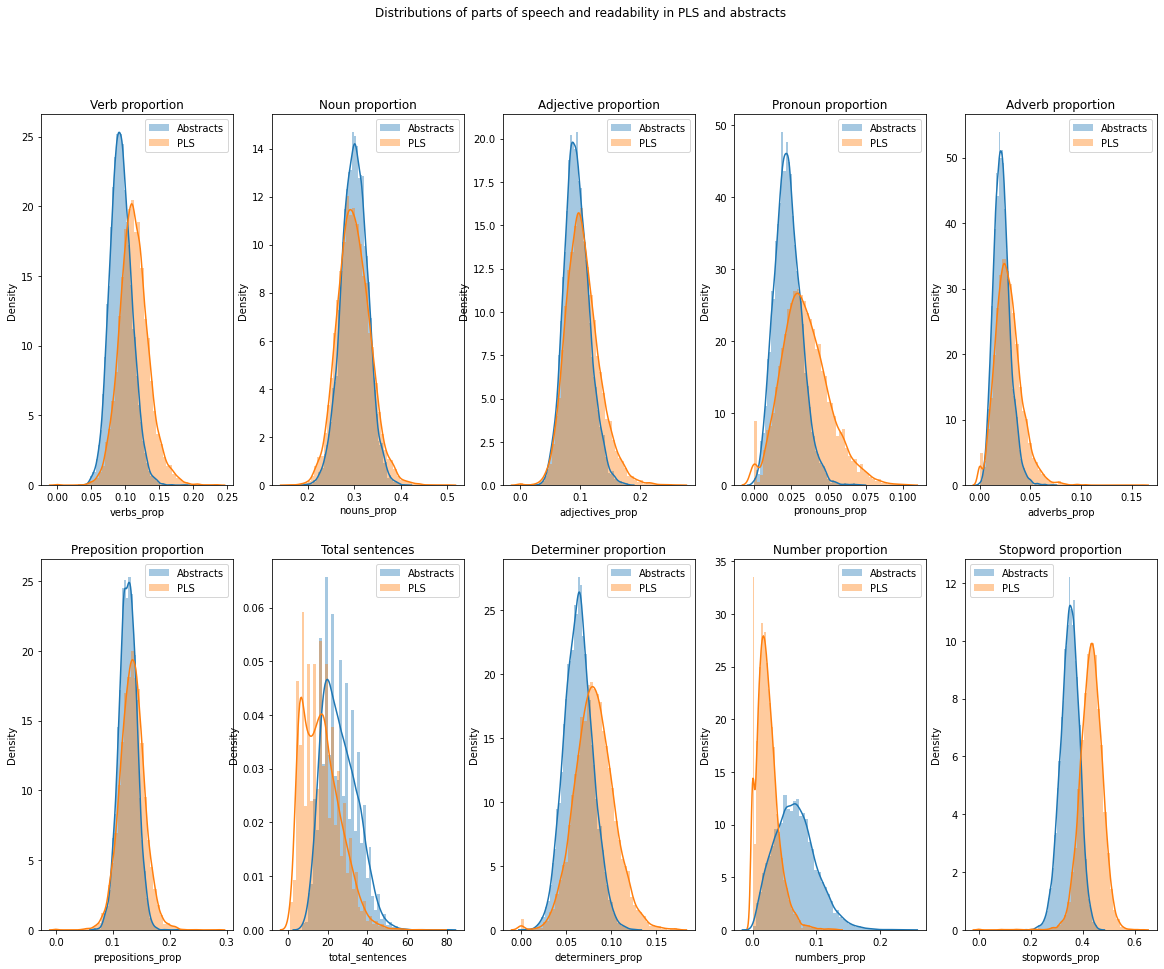

In [52]:
# Plot in a multiple graph verb_prop, noun_prop, adjective_prop, pronoun_prop, adverb_prop, preposition_prop, interjection_prop, determiner_prop, number_prop, stopwords_prop for abstracts and pls distributions 
# and compare it with the distribution of readability in PLS
fig, ax = plt.subplots(2, 5, figsize=(20, 15))
fig.suptitle('Distributions of parts of speech and readability in PLS and abstracts')

# Verb prop
sns.distplot(abstracts_distributions['verbs_prop'], ax=ax[0, 0], label='Abstracts')
sns.distplot(pls_distributions['verbs_prop'], ax=ax[0, 0], label='PLS')
ax[0, 0].set_title('Verb proportion')
ax[0, 0].legend()

# Noun prop
sns.distplot(abstracts_distributions['nouns_prop'], ax=ax[0, 1], label='Abstracts')
sns.distplot(pls_distributions['nouns_prop'], ax=ax[0, 1], label='PLS')
ax[0, 1].set_title('Noun proportion')
ax[0, 1].legend()

# Adjective prop
sns.distplot(abstracts_distributions['adjectives_prop'], ax=ax[0, 2], label='Abstracts')
sns.distplot(pls_distributions['adjectives_prop'], ax=ax[0, 2], label='PLS')
ax[0, 2].set_title('Adjective proportion')
ax[0, 2].legend()

# Pronoun prop
sns.distplot(abstracts_distributions['pronouns_prop'], ax=ax[0, 3], label='Abstracts')
sns.distplot(pls_distributions['pronouns_prop'], ax=ax[0, 3], label='PLS')
ax[0, 3].set_title('Pronoun proportion')
ax[0, 3].legend()

# Adverb prop
sns.distplot(abstracts_distributions['adverbs_prop'], ax=ax[0, 4], label='Abstracts')
sns.distplot(pls_distributions['adverbs_prop'], ax=ax[0, 4], label='PLS')
ax[0, 4].set_title('Adverb proportion')
ax[0, 4].legend()

# Preposition prop
sns.distplot(abstracts_distributions['prepositions_prop'], ax=ax[1, 0], label='Abstracts')
sns.distplot(pls_distributions['prepositions_prop'], ax=ax[1, 0], label='PLS')
ax[1, 0].set_title('Preposition proportion')
ax[1, 0].legend()

# total_sentences
sns.distplot(abstracts_distributions['total_sentences'], ax=ax[1, 1], label='Abstracts')
sns.distplot(pls_distributions['total_sentences'], ax=ax[1, 1], label='PLS')
ax[1, 1].set_title('Total sentences')
ax[1, 1].legend()

# Determiner prop
sns.distplot(abstracts_distributions['determiners_prop'], ax=ax[1, 2], label='Abstracts')
sns.distplot(pls_distributions['determiners_prop'], ax=ax[1, 2], label='PLS')
ax[1, 2].set_title('Determiner proportion')
ax[1, 2].legend()

# Number prop
sns.distplot(abstracts_distributions['numbers_prop'], ax=ax[1, 3], label='Abstracts')
sns.distplot(pls_distributions['numbers_prop'], ax=ax[1, 3], label='PLS')
ax[1, 3].set_title('Number proportion')
ax[1, 3].legend()

# Stopword prop
sns.distplot(abstracts_distributions['stopwords_prop'], ax=ax[1, 4], label='Abstracts')
sns.distplot(pls_distributions['stopwords_prop'], ax=ax[1, 4], label='PLS')
ax[1, 4].set_title('Stopword proportion')
ax[1, 4].legend()

plt.show()

In [61]:
# Shapiro test for verb_prop, noun_prop, adjective_prop, pronoun_prop, adverb_prop, preposition_prop, interjection_prop, determiner_prop, number_prop, stopwords_prop for abstracts and pls distributions 
# to check if the distributions are normal

# Verb prop
print('Verb proportion')
# Sampling differences
sampling_difference = abstracts_distributions['verbs_prop'] - pls_distributions['verbs_prop']
# Shapiro test
print('Shapiro test for sampling differences: ', stats.shapiro(sampling_difference))
print('Abstracts: ', stats.shapiro(abstracts_distributions['verbs_prop']))
print('PLS: ', stats.shapiro(pls_distributions['verbs_prop']))

# Loop through all columns and save the results in a txt file
for column in ['total_sentences', 'verbs_prop', 'nouns_prop', 'adjectives_prop', 'pronouns_prop', 'adverbs_prop', 'prepositions_prop', 'determiners_prop', 'interjections_prop', 'numbers_prop', 'stopwords_prop']:
    sampling_differences = abstracts_distributions[column] - pls_distributions[column]
    with open('results.txt', 'a') as f:
        f.write("----------------" + column + "----------------" + '\n')
        f.write('Shapiro test for sampling differences: ' + str(stats.shapiro(sampling_differences)) + '\n')
        f.write('Abstracts: ' + str(stats.shapiro(abstracts_distributions[column])) + '\n')
        f.write('PLS: ' + str(stats.shapiro(pls_distributions[column])) + '\n')
        f.write('\n')

Verb proportion
Shapiro test for sampling differences:  ShapiroResult(statistic=0.9914404153823853, pvalue=3.4765120287929164e-22)
Abstracts:  ShapiroResult(statistic=0.995353102684021, pvalue=6.94007339728628e-16)
PLS:  ShapiroResult(statistic=0.9875097274780273, pvalue=1.1845866612749148e-26)


In [69]:
# stats.levene for verb_prop, noun_prop, adjective_prop, pronoun_prop, adverb_prop, preposition_prop, interjection_prop, determiner_prop, number_prop, stopwords_prop for abstracts and pls distributions
# to check if the variances are equal

# Loop 
for column in ['total_sentences', 'verbs_prop', 'nouns_prop', 'adjectives_prop', 'pronouns_prop', 'adverbs_prop', 'prepositions_prop', 'determiners_prop', 'interjections_prop', 'numbers_prop', 'stopwords_prop']:
    print('----------------' + column + '----------------')
    print(stats.levene(abstracts_distributions[column], pls_distributions[column]))


----------------total_sentences----------------
LeveneResult(statistic=30.77565167980409, pvalue=2.9398796424127252e-08)
----------------verbs_prop----------------
LeveneResult(statistic=450.7445094171664, pvalue=9.598776453708835e-99)
----------------nouns_prop----------------
LeveneResult(statistic=370.75059105415494, pvalue=9.603354532680468e-82)
----------------adjectives_prop----------------
LeveneResult(statistic=490.3235206672139, pvalue=4.003749319038639e-107)
----------------pronouns_prop----------------
LeveneResult(statistic=1900.0589143400884, pvalue=0.0)
----------------adverbs_prop----------------
LeveneResult(statistic=1049.923217760307, pvalue=1.6103707177180549e-223)
----------------prepositions_prop----------------
LeveneResult(statistic=653.5373350391044, pvalue=1.8152300438176532e-141)
----------------determiners_prop----------------
LeveneResult(statistic=639.1106170359783, pvalue=1.9102799419182118e-138)
----------------interjections_prop----------------
LeveneRes

In [70]:
# mannwhitneyu for verb_prop, noun_prop, adjective_prop, pronoun_prop, adverb_prop, preposition_prop, interjection_prop, determiner_prop, number_prop, stopwords_prop for abstracts and pls distributions
# to check if the distributions are equal

# Loop
for column in ['total_sentences', 'verbs_prop', 'nouns_prop', 'adjectives_prop', 'pronouns_prop', 'adverbs_prop', 'prepositions_prop', 'determiners_prop', 'interjections_prop', 'numbers_prop', 'stopwords_prop']:
    print('----------------' + column + '----------------')
    print(stats.mannwhitneyu(abstracts_distributions[column], pls_distributions[column]))

----------------total_sentences----------------
MannwhitneyuResult(statistic=55011480.5, pvalue=0.0)
----------------verbs_prop----------------
MannwhitneyuResult(statistic=16601355.0, pvalue=0.0)
----------------nouns_prop----------------
MannwhitneyuResult(statistic=37373899.0, pvalue=1.1648917763385553e-06)
----------------adjectives_prop----------------
MannwhitneyuResult(statistic=28471918.5, pvalue=2.042985753732941e-118)
----------------pronouns_prop----------------
MannwhitneyuResult(statistic=19083617.5, pvalue=0.0)
----------------adverbs_prop----------------
MannwhitneyuResult(statistic=24747836.0, pvalue=4.625791795104217e-266)
----------------prepositions_prop----------------
MannwhitneyuResult(statistic=27756939.0, pvalue=3.7927679978798585e-142)
----------------determiners_prop----------------
MannwhitneyuResult(statistic=18233421.5, pvalue=0.0)
----------------interjections_prop----------------
MannwhitneyuResult(statistic=36469754.0, pvalue=2.769817304521937e-09)
-----

In [73]:
# Normalize the data
abstracts_distributions_norm = abstracts_distributions.copy()
pls_distributions_norm = pls_distributions.copy()

# Loop through all columns and normalize the data
for column in ['total_sentences', 'verbs_prop', 'nouns_prop', 'adjectives_prop', 'pronouns_prop', 'adverbs_prop', 'prepositions_prop', 'determiners_prop', 'interjections_prop', 'numbers_prop', 'stopwords_prop']:
    abstracts_distributions_norm[column] = (abstracts_distributions_norm[column] - abstracts_distributions_norm[column].mean()) / abstracts_distributions_norm[column].std()
    pls_distributions_norm[column] = (pls_distributions_norm[column] - pls_distributions_norm[column].mean()) / pls_distributions_norm[column].std()

c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

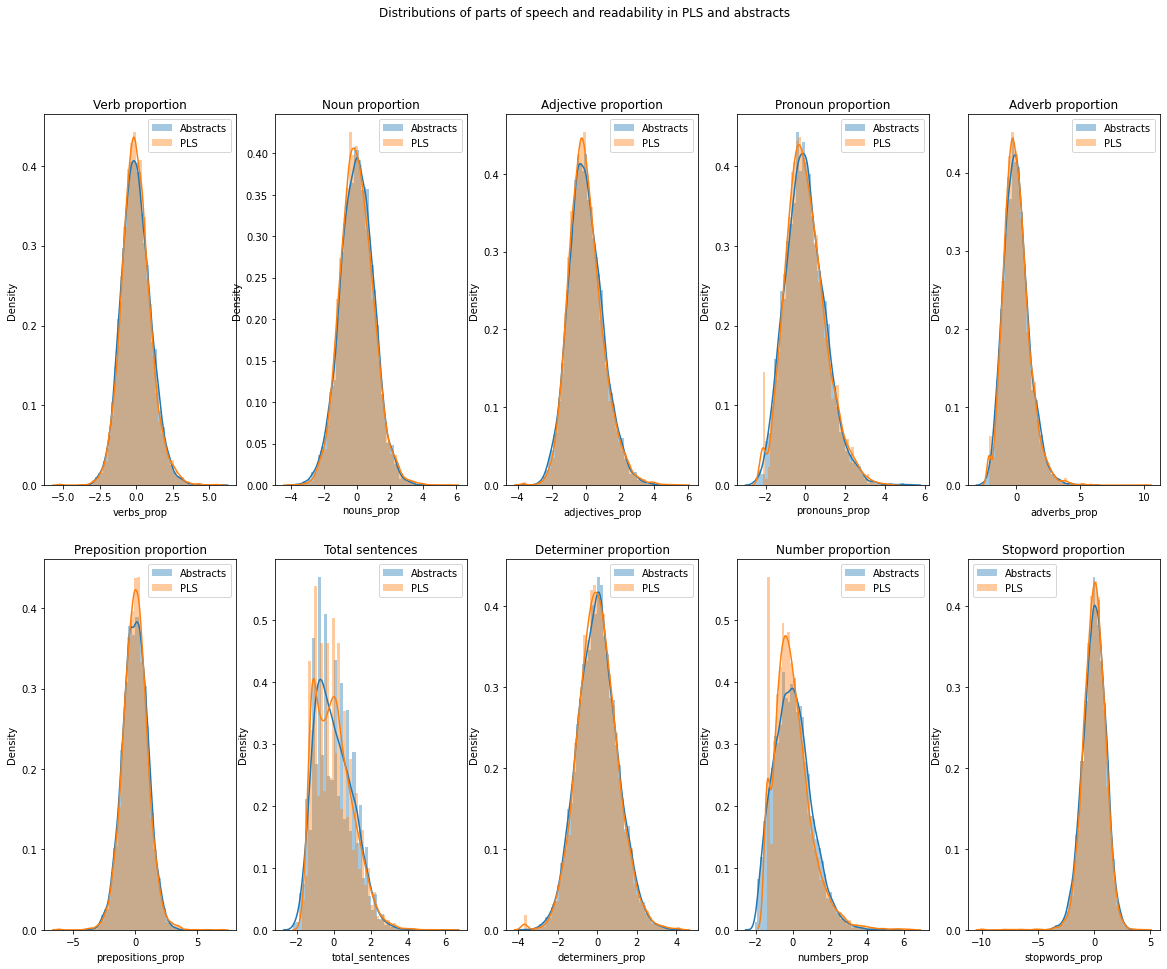

In [74]:
# Plot in a multiple graph verb_prop, noun_prop, adjective_prop, pronoun_prop, adverb_prop, preposition_prop, interjection_prop, determiner_prop, number_prop, stopwords_prop for abstracts and pls distributions 
# and compare it with the distribution of readability in PLS
fig, ax = plt.subplots(2, 5, figsize=(20, 15))
fig.suptitle('Distributions of parts of speech and readability in PLS and abstracts')

# Verb prop
sns.distplot(abstracts_distributions_norm['verbs_prop'], ax=ax[0, 0], label='Abstracts')
sns.distplot(pls_distributions_norm['verbs_prop'], ax=ax[0, 0], label='PLS')
ax[0, 0].set_title('Verb proportion')
ax[0, 0].legend()

# Noun prop
sns.distplot(abstracts_distributions_norm['nouns_prop'], ax=ax[0, 1], label='Abstracts')
sns.distplot(pls_distributions_norm['nouns_prop'], ax=ax[0, 1], label='PLS')
ax[0, 1].set_title('Noun proportion')
ax[0, 1].legend()

# Adjective prop
sns.distplot(abstracts_distributions_norm['adjectives_prop'], ax=ax[0, 2], label='Abstracts')
sns.distplot(pls_distributions_norm['adjectives_prop'], ax=ax[0, 2], label='PLS')
ax[0, 2].set_title('Adjective proportion')
ax[0, 2].legend()

# Pronoun prop
sns.distplot(abstracts_distributions_norm['pronouns_prop'], ax=ax[0, 3], label='Abstracts')
sns.distplot(pls_distributions_norm['pronouns_prop'], ax=ax[0, 3], label='PLS')
ax[0, 3].set_title('Pronoun proportion')
ax[0, 3].legend()

# Adverb prop
sns.distplot(abstracts_distributions_norm['adverbs_prop'], ax=ax[0, 4], label='Abstracts')
sns.distplot(pls_distributions_norm['adverbs_prop'], ax=ax[0, 4], label='PLS')
ax[0, 4].set_title('Adverb proportion')
ax[0, 4].legend()

# Preposition prop
sns.distplot(abstracts_distributions_norm['prepositions_prop'], ax=ax[1, 0], label='Abstracts')
sns.distplot(pls_distributions_norm['prepositions_prop'], ax=ax[1, 0], label='PLS')
ax[1, 0].set_title('Preposition proportion')
ax[1, 0].legend()

# total_sentences
sns.distplot(abstracts_distributions_norm['total_sentences'], ax=ax[1, 1], label='Abstracts')
sns.distplot(pls_distributions_norm['total_sentences'], ax=ax[1, 1], label='PLS')
ax[1, 1].set_title('Total sentences')
ax[1, 1].legend()

# Determiner prop
sns.distplot(abstracts_distributions_norm['determiners_prop'], ax=ax[1, 2], label='Abstracts')
sns.distplot(pls_distributions_norm['determiners_prop'], ax=ax[1, 2], label='PLS')
ax[1, 2].set_title('Determiner proportion')
ax[1, 2].legend()

# Number prop
sns.distplot(abstracts_distributions_norm['numbers_prop'], ax=ax[1, 3], label='Abstracts')
sns.distplot(pls_distributions_norm['numbers_prop'], ax=ax[1, 3], label='PLS')
ax[1, 3].set_title('Number proportion')
ax[1, 3].legend()

# Stopword prop
sns.distplot(abstracts_distributions_norm['stopwords_prop'], ax=ax[1, 4], label='Abstracts')
sns.distplot(pls_distributions_norm['stopwords_prop'], ax=ax[1, 4], label='PLS')
ax[1, 4].set_title('Stopword proportion')
ax[1, 4].legend()

plt.show()

In [76]:
# Ttest for the normalized data
# Loop
for column in ['total_sentences', 'verbs_prop', 'nouns_prop', 'adjectives_prop', 'pronouns_prop', 'adverbs_prop', 'prepositions_prop', 'determiners_prop', 'interjections_prop', 'numbers_prop', 'stopwords_prop']:
    print('----------------' + column + '----------------')
    print(stats.ttest_ind(abstracts_distributions_norm[column], pls_distributions_norm[column], equal_var=False))


----------------total_sentences----------------
Ttest_indResult(statistic=-5.6793033193769024e-15, pvalue=0.9999999999999954)
----------------verbs_prop----------------
Ttest_indResult(statistic=1.5891127557102682e-14, pvalue=0.9999999999999873)
----------------nouns_prop----------------
Ttest_indResult(statistic=-1.2052136947946948e-13, pvalue=0.9999999999999039)
----------------adjectives_prop----------------
Ttest_indResult(statistic=3.6970080261713116e-14, pvalue=0.9999999999999705)
----------------pronouns_prop----------------
Ttest_indResult(statistic=1.1358606638753805e-14, pvalue=0.9999999999999909)
----------------adverbs_prop----------------
Ttest_indResult(statistic=-1.3979823555389298e-14, pvalue=0.9999999999999889)
----------------prepositions_prop----------------
Ttest_indResult(statistic=-9.583824351448522e-15, pvalue=0.9999999999999923)
----------------determiners_prop----------------
Ttest_indResult(statistic=-3.920903637800593e-14, pvalue=0.9999999999999687)
---------

In [54]:
# Keep the same rows with DOI in both abstracts and readability
abstracts_readability = abstracts_readability[abstracts_readability['DOI'].isin(pls_distributions['DOI'])]
pls_readability = pls_readability[pls_readability['DOI'].isin(pls_distributions['DOI'])]
# Sentence_beginnings
abstracts_sentence_beginnings = abstracts_sentence_beginnings[abstracts_sentence_beginnings['DOI'].isin(pls_distributions['DOI'])]
pls_sentence_beginnings = pls_sentence_beginnings[pls_sentence_beginnings['DOI'].isin(pls_distributions['DOI'])]
# Sentence_info
abstracts_sentence_info = abstracts_sentence_info[abstracts_sentence_info['DOI'].isin(pls_distributions['DOI'])]
pls_sentence_info = pls_sentence_info[pls_sentence_info['DOI'].isin(pls_distributions['DOI'])]
# Word_info
abstracts_word_usage = abstracts_word_usage[abstracts_word_usage['DOI'].isin(pls_distributions['DOI'])]
pls_word_usage = pls_word_usage[pls_word_usage['DOI'].isin(pls_distributions['DOI'])]


In [55]:
abstracts_readability.columns

Index(['DOI', 'Kincaid', 'ARI', 'Coleman-Liau', 'FleschReadingEase',
       'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex'],
      dtype='object')

c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\felip\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

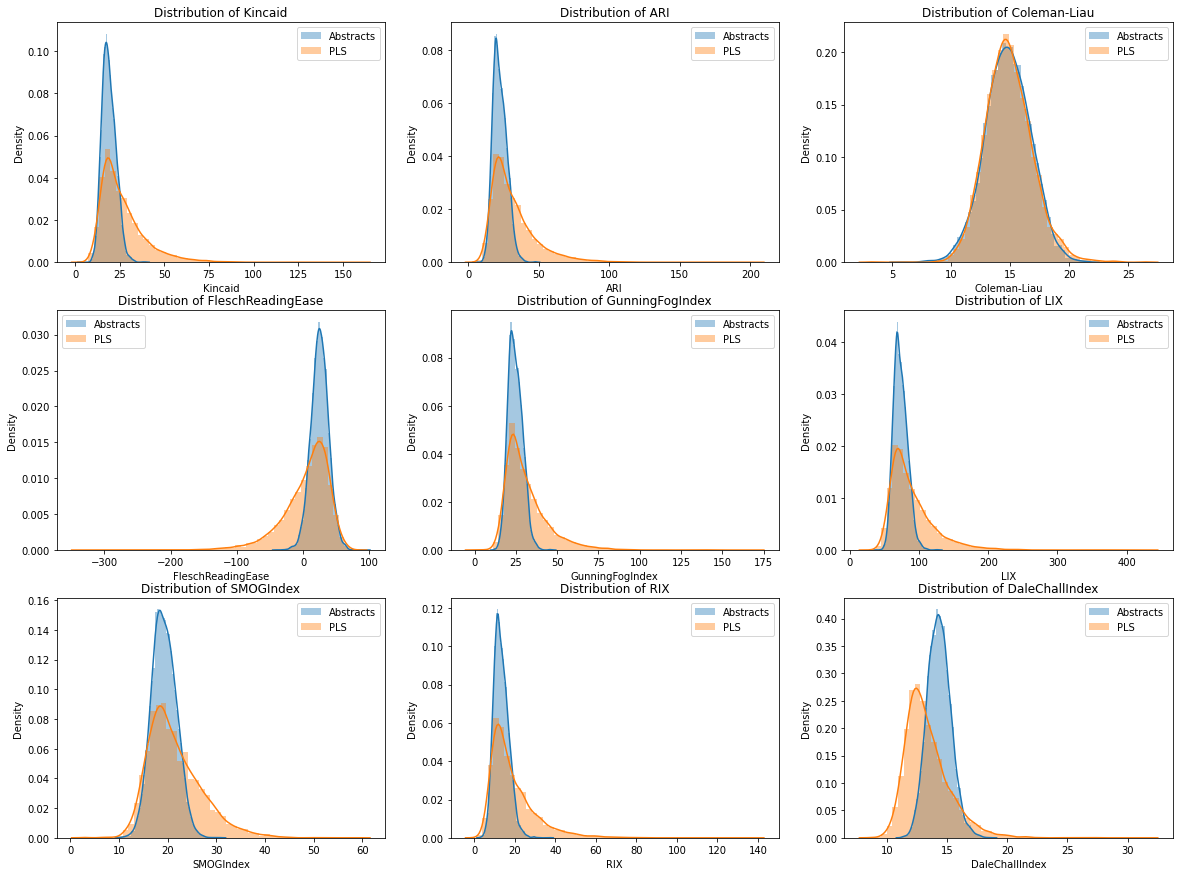

In [56]:
# Plot a multiple graph of readability distribution of Kincaid, 'ARI', 'Coleman-Liau', 'FleschReadingEase', 'GunningFogIndex', 'LIX', 'SMOGIndex', 'RIX', 'DaleChallIndex' 
# and compare it with the distribution of readability in PLS

fig, ax = plt.subplots(3, 3, figsize=(20, 15))
sns.distplot(abstracts_readability['Kincaid'], ax=ax[0, 0], label='Abstracts')
sns.distplot(pls_readability['Kincaid'], ax=ax[0, 0], label='PLS')
ax[0, 0].set_title('Distribution of Kincaid')
ax[0, 0].set_xlabel('Kincaid')
ax[0, 0].set_ylabel('Density')
ax[0, 0].legend()

sns.distplot(abstracts_readability['ARI'], ax=ax[0, 1], label='Abstracts')
sns.distplot(pls_readability['ARI'], ax=ax[0, 1], label='PLS')
ax[0, 1].set_title('Distribution of ARI')
ax[0, 1].set_xlabel('ARI')
ax[0, 1].set_ylabel('Density')
ax[0, 1].legend()

sns.distplot(abstracts_readability['Coleman-Liau'], ax=ax[0, 2], label='Abstracts')
sns.distplot(pls_readability['Coleman-Liau'], ax=ax[0, 2], label='PLS')
ax[0, 2].set_title('Distribution of Coleman-Liau')
ax[0, 2].set_xlabel('Coleman-Liau')
ax[0, 2].set_ylabel('Density')
ax[0, 2].legend()

sns.distplot(abstracts_readability['FleschReadingEase'], ax=ax[1, 0], label='Abstracts')
sns.distplot(pls_readability['FleschReadingEase'], ax=ax[1, 0], label='PLS')
ax[1, 0].set_title('Distribution of FleschReadingEase')
ax[1, 0].set_xlabel('FleschReadingEase')
ax[1, 0].set_ylabel('Density')
ax[1, 0].legend()

sns.distplot(abstracts_readability['GunningFogIndex'], ax=ax[1, 1], label='Abstracts')
sns.distplot(pls_readability['GunningFogIndex'], ax=ax[1, 1], label='PLS')
ax[1, 1].set_title('Distribution of GunningFogIndex')
ax[1, 1].set_xlabel('GunningFogIndex')
ax[1, 1].set_ylabel('Density')
ax[1, 1].legend()

sns.distplot(abstracts_readability['LIX'], ax=ax[1, 2], label='Abstracts')
sns.distplot(pls_readability['LIX'], ax=ax[1, 2], label='PLS')
ax[1, 2].set_title('Distribution of LIX')
ax[1, 2].set_xlabel('LIX')
ax[1, 2].set_ylabel('Density')
ax[1, 2].legend()

sns.distplot(abstracts_readability['SMOGIndex'], ax=ax[2, 0], label='Abstracts')
sns.distplot(pls_readability['SMOGIndex'], ax=ax[2, 0], label='PLS')
ax[2, 0].set_title('Distribution of SMOGIndex')
ax[2, 0].set_xlabel('SMOGIndex')
ax[2, 0].set_ylabel('Density')
ax[2, 0].legend()

sns.distplot(abstracts_readability['RIX'], ax=ax[2, 1], label='Abstracts')
sns.distplot(pls_readability['RIX'], ax=ax[2, 1], label='PLS')
ax[2, 1].set_title('Distribution of RIX')
ax[2, 1].set_xlabel('RIX')
ax[2, 1].set_ylabel('Density')
ax[2, 1].legend()

sns.distplot(abstracts_readability['DaleChallIndex'], ax=ax[2, 2], label='Abstracts')
sns.distplot(pls_readability['DaleChallIndex'], ax=ax[2, 2], label='PLS')
ax[2, 2].set_title('Distribution of DaleChallIndex')
ax[2, 2].set_xlabel('DaleChallIndex')
ax[2, 2].set_ylabel('Density')
ax[2, 2].legend()

plt.show()



